In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [402]:
import os
for dirname, _, filenames in os.walk('Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Data\gender_submission.csv
Data\test.csv
Data\train.csv


## Loading the data

In [473]:
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [479]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [477]:
data_alive = train_data[train_data['Survived'] == 1]
data_dead = train_data[train_data['Survived'] == 0]
data_alive.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [478]:
data_dead.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


### Number of NaN values across the dataframe

In [405]:
print(test_data.isnull().sum(axis = 0))
print(train_data.isnull().sum(axis = 0))
print(test_data[test_data.Fare.isnull()])

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


Total value space across dataframe

In [406]:
for column in train_data.columns[1:]:
    print(column, 'column')
    print("Potential values:", train_data[column].unique())
    print("Number of missing values:", train_data[column].isna().sum())

Survived column
Potential values: [0 1]
Number of missing values: 0
Pclass column
Potential values: [3 1 2]
Number of missing values: 0
Name column
Potential values: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Dani

Many data input as 'nan', so not parsed as NaN by python.

In [407]:
train_data.mask((train_data == 'nan'))
train_data.isnull().sum()

C:\Users\Tom Webber\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Pattern exploration - by gender

Check the unique values within the 'Sex' column, and check if there are any missing values

In [408]:
print(train_data.columns)
print('\'Sex\' column')
print("Potential values:", train_data.Sex.unique())
print("Number of missing values:", train_data.Sex.isna().sum())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
'Sex' column
Potential values: ['male' 'female']
Number of missing values: 0


In [409]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("{0:.1f}% of women survived".format(rate_women*100))

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("{0:.1f}% of men survived".format(rate_men*100))

74.2% of women survived
18.9% of men survived


### Tackling the ticket formatting

Any column with no missing values may have some intrinsic value for the predictive accuracy. Ticket number could correlate with cabin position, for example, which may influence the ability to get off the ship and survive.

The ticket column has no missing values, but the formatting is inconsistent. Ideally I would split the column into the ticket number as well as any text.

re.findall allows me to extract numbers within the string.

After that I'll need to process the string contents, which are varied in formatting (with full stops, slashes and spaces used inconsistently).

Some tinkering reveals that I'll need to mask to avoid a repeating '2. ####' format, so I'll search for integer number (not floating point) with at least two digits.

In [489]:
import re
import seaborn as sns
import string
train_data = pd.read_csv('Data/train.csv')
Tickets = train_data.Ticket.str.split(r"(?=(?:\D*\d))([a-zA-Z0-9]*$)", expand = True)
Tickets[0] = Tickets[0].str.translate(str.maketrans('', '', string.punctuation))
Tickets[0] = Tickets[0].str.upper()
Tickets[0] = Tickets[0].str.replace(" ", "")
Tickets[0] = Tickets[0].str.replace("STONO2", "SOTONO2")
Tickets[0] = Tickets[0].str.replace(r"\bAS\b", "A5")
Tickets[0] = Tickets[0].str.replace("SOP", "SOPP")
Tickets[0] = Tickets[0].str.replace("SOPPP", "SOPP")
Tickets[0] = Tickets[0].str.replace(r"\bA4\b", "SCA4")
Tickets.rename(columns={0:'Ticket_str', 1:'Ticket_num'}, inplace = True)
Tickets['Ticket_str'].unique()
# ticket_data = train_data['ticket_number'].fillna(0).astype(int)
# train_data['Ticket'] = ticket_data
# #df["A"].str.extract("(\d*\.?\d+)", expand=True)
# sns.distplot(train_data['Ticket'])

# test_data['ticket_number'] = test_data.Ticket.str.extract(r"(?=(?:\D*\d))([a-zA-Z0-9]*$)", expand = True)
# ticket_data = pd.to_numeric(test_data['ticket_number'])
# ticket_data = pd.Series(test_data['ticket_number'])
# test_data['Ticket'] = ticket_data

array(['A5', 'PC', 'SOTONO2', '', 'PP', 'CA', 'SCPARIS', 'SCA4', 'SP',
       'SOC', 'WC', 'SOTONOQ', 'WEP', 'C', 'SOPP', 'FA', 'LINE', 'FCC',
       'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'SCAHBASLE', 'FC', 'CASOTON'],
      dtype=object)

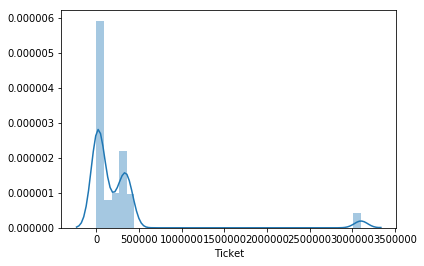

In [418]:
test_data = pd.read_csv('Data/test.csv')
test_data['ticket_number'] = test_data.Ticket.str.extract(r"(?=(?:\D*\d))([a-zA-Z0-9]*$)", expand = True)
ticket_data_test = test_data['ticket_number'].fillna(0).astype(int)
test_data['Ticket'] = ticket_data_test
#df["A"].str.extract("(\d*\.?\d+)", expand=True)
sns.distplot(test_data['Ticket'])

(0, 50000)

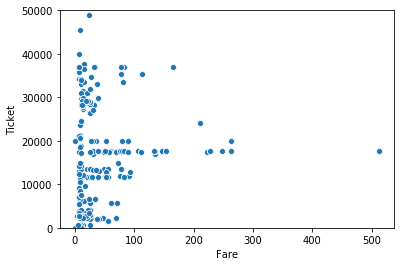

In [419]:
sns.scatterplot(data = train_data, x = 'Fare', y = 'Ticket')
plt.ylim(0, 50000)

Looking into why the Fares are not linear with Ticket number.
Possible code on the ticket number?

In [432]:
over_500 = train_data[train_data['Fare'] > 500]
print(over_500)
over_200 = train_data.Ticket[(train_data['Fare'] > 200) & (train_data['Fare'] <= 500)]
print(over_200.unique())
bet_100_200 = train_data.Ticket[(train_data['Fare'] > 100) & (train_data['Fare'] <= 200)]
print(bet_100_200.unique())
bet_50_100 = train_data.Ticket[(train_data['Fare'] > 50) & (train_data['Fare'] <= 100)]
print(bet_50_100.unique())

     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch  Ticket      Fare        Cabin Embarked  \
258  female  35.0      0      0   17755  512.3292          NaN        C   
679    male  36.0      0      1   17755  512.3292  B51 B53 B55        C   
737    male  35.0      0      0   17755  512.3292         B101        C   

    ticket_number  
258         17755  
679         17755  
737         17755  
[ 19950  17558  17608 113503  17757  17483  24160]
[ 17569  35273  17582  17760 113781  17421  17758  36928  16966  17611
 113760  17761]
[ 17599 113803  17463  17604 113789  17572 113509 113572  36973  14879
   1601   5734  17759  35281 110465  17593 113776  17597   2343 113505
  11813  19943  19928  11751  17585 110152

Note:

Including ticket did not improve the model accuracy vs. ["Pclass", "Sex", "SibSp", "Parch"] alone.

How about surname?

## Cabin data
- very partial, and includes some with multiple values 
    - looking into this, the multiple values are shared between family members. Likely indicates a single ticket being bought for multiple rooms to share.
- unsure how to proceed. Maybe make a second column for extra values?

## Fares
- Could this be a big determinant in deciding if you survive?


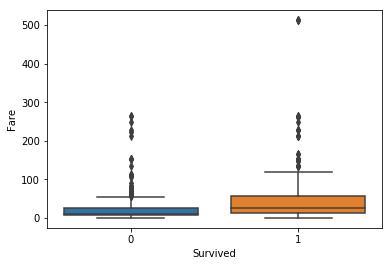

In [414]:
#from statannot import add_stat_annotation

sns.boxplot(data = train_data, x = 'Survived', y = 'Fare')
# add_stat_annotation(ax, data=df, x=x, y=y, hue=hue,
#                     box_pairs=[(0,1)])

## Names!
 - Surnames, titles, and maiden names
 - All useful information in determining passenger relationships (are fathers less likely than sons to survive?)

In [415]:
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')

def Split_names(df):
    Surnames = df.Name.str.split(pat = ", ", expand = True)
    Surnames.rename(columns={0:'Surname', 1:'Other_names'}, inplace=True)
    Title = Surnames.Other_names.str.split(pat = '\. ', expand = True)
    Title.rename(columns={0:'Title', 1:'Other_names'}, inplace = True)
    Maiden_name = Surnames.Other_names.str.extract('.*\((.*)\).*')
    Maiden_name.rename(columns={0:'Maiden_name'}, inplace = True)
    Other_names = Title.Other_names.str.split('\(', expand = True)
    Other_names.rename(columns={0:'Other_names', 1:'Maiden'}, inplace = True)
    
    df = df.join(Surnames['Surname'])
    df = df.join(Title['Title'])
    df = df.join(Maiden_name)
    df = df.join(Other_names['Other_names'])
    
    return df

train_data = Split_names(train_data)
print(train_data.columns)
print(test_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Surname', 'Title',
       'Maiden_name', 'Other_names'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
grouped = train_data.groupby('Surname')

for name, group in grouped:
   print(name)
   print(group)

### Training a model - Random Forest to start

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators = 100, 
                               max_depth = 5, 
                               random_state = 1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId' : test_data.PassengerId, 'Survived' : predictions})
output.to_csv('RF_submission_1.csv', index = False)
print("Saved it!")